## The CIFAR-10 Dataset
Contains 10 categories of images
##### airplane
##### automobile
#####  bird
#####  cat
#####  deer
#####  dog
#####  frog
#####  horse
#####  ship
#####  truck

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
import os
from keras.layers import Dense,Dropout,Activation,Flatten,MaxPooling2D,Conv2D

batch_size = 32
num_classes = 10
epochs = 10

#Load the CIfar dataset
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

#Display our data shape and dimensions
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

#Format our train data by changing data type nd normalising
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

#Now one hot encoding
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],activation='relu'))
#X_train-shape[1:] = 32,32,3
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

          
          
# initiate RMSprop optimizer and configure some parameters
optimizer = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6) #Reducing loss fxn

#Let's create our model
model.compile(loss='categorical_crossentropy', optimizer = optimizer,metrics=['accuracy'])

print(model.summary())



X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test shape (10000, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
________

## Training our model

In [6]:
history = model.fit(X_train,y_train,
                   batch_size=batch_size,epochs = epochs,
                   validation_data=(X_test,y_test),
                   shuffle=True)

model.save("Digit_Recogniser_Cifar3.h5")




Epoch 1/10
1563/1563 [==============================] - 31s 18ms/step - loss: 1.8839 - accuracy: 0.3067 - val_loss: 1.6449 - val_accuracy: 0.4163
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5527 - accuracy: 0.4347 - val_loss: 1.4887 - val_accuracy: 0.4630
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4200 - accuracy: 0.4887 - val_loss: 1.3272 - val_accuracy: 0.5187
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.3335 - accuracy: 0.5235 - val_loss: 1.2416 - val_accuracy: 0.5558
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.2604 - accuracy: 0.5500 - val_loss: 1.1813 - val_accuracy: 0.5815
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1994 - accuracy: 0.5762 - val_loss: 1.1534 - val_accuracy: 0.5940
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1494 - accuracy: 0.5926 - val_loss: 1.1001 -

In [8]:
from keras.models import load_model

classifier = load_model("Digit_Recogniser_Cifar3.h5")


# Evaluate the performance of our trained model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


313/313 [==============================] - 6s 19ms/step - loss: 0.9505 - accuracy: 0.6730
Test loss: 0.9504651427268982
Test accuracy: 0.6729999780654907


## Plotting our accuracy Loss Charts

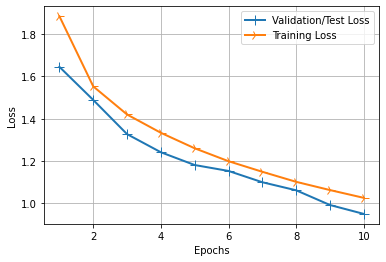

In [9]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

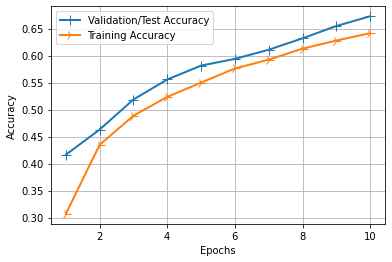

In [10]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

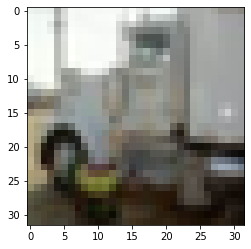

In [25]:
#Displaying random image
import matplotlib.pyplot as plt
plt.imshow(X_train[31])
plt.show()

# Running some test

In [28]:
from keras.models import load_model
import numpy as np
import cv2 
img_row,img_height,img_depth = 32,32,3
classifier = load_model("Digit_Recogniser_Cifar3.h5")
color = True
scale = 8

def draw_test(name, res, input_im, scale, img_row, img_height):
    BLACK = [0,0,0]
    res = int(res)
    if res == 0:
        pred = "airplane"
    if res == 1:
        pred = "automobile"
    if res == 2:
        pred = "bird"
    if res == 3:
        pred = "cat"
    if res == 4:
        pred = "deer"
    if res == 5:
        pred = "dog"
    if res == 6:
        pred = "frog"
    if res == 7:
        pred = "horse"
    if res == 8:
        pred = "ship"
    if res == 9:
        pred = "truck"
        
    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0]*2,
                                       cv2.BORDER_CONSTANT,value=BLACK)
    if color == False:
        expanded_image = cv2.cvtCOLOR(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(300,80),cv2.FONT_HERSHEY_COMPLEX_SMALL,3,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    

for i in range(0,10):
    rand = np.random.randint(0,len(X_test))
    input_im = X_test[rand]
    imageL = cv2.resize(input_im,None,fx = scale, fy = scale, interpolation=
                       cv2.INTER_CUBIC)
    input_im= input_im.reshape(1,img_row,img_height,img_depth)
    
    # get prediction
    res = str(np.argmax(classifier.predict(input_im, 1, verbose = 0)[0]))
    
    draw_test("0123456789"[i],res,imageL,scale,img_row,img_height)
    cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!git add Digit_Recogniser_Cifar10.ipynb Digit_Recogniser_Cifar2.h5 Digit_Recogniser_Cifar3.h5
! git commit -m "17:53/29-04-2021"
! git push origin main